In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Load the dataset and display the first 5 rows

In [2]:
df = pd.read_csv("data/ai_assistant_usage_student_life.csv")
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


Check the dataset shape (rows, columns)

In [3]:
df.shape

(10000, 11)

Display column names and their data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


Check for missing values in each column.

In [5]:
df.isnull().sum()

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

Show summary statistics for SessionLengthMin and TotalPrompts.

In [6]:
df[["SessionLengthMin", "TotalPrompts"]].describe()

,SessionLengthMin,TotalPrompts
count,10000.000000,10000.000000
mean,19.846467,5.607500
std,13.897302,4.648764
min,0.030000,1.000000
25%,9.630000,2.000000
50%,16.650000,4.000000
75%,26.670000,8.000000
max,110.810000,39.000000


Find the number of unique values in StudentLevel, Discipline, and TaskType.

In [7]:
student_lev_cnt = df["StudentLevel"].value_counts()
discipline_count = df["Discipline"].value_counts()
TaskType_count = df["TaskType"].value_counts()

print(student_lev_cnt, discipline_count,TaskType_count )


StudentLevel
Undergraduate    5978
High School      2027
Graduate         1995
Name: count, dtype: int64 Discipline
Biology             1458
Computer Science    1445
Engineering         1430
Math                1422
Psychology          1418
History             1417
Business            1410
Name: count, dtype: int64 TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64


Which TaskType is the most common?

In [8]:
TaskType_count = df["TaskType"].value_counts()
TaskType_count

TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64

Calculate the average SessionLengthMin for each StudentLevel.

In [9]:
df["SessionLengthMin"].mean()

19.846467

In [10]:
# Calc average "SessionLengthMin" groupby "StudentLevel"
df.groupby("StudentLevel")["SessionLengthMin"].mean().round(2)

StudentLevel
Graduate         20.25
High School      20.02
Undergraduate    19.65
Name: SessionLengthMin, dtype: float64

## Visualization 

Plot a histogram of SessionLengthMin.

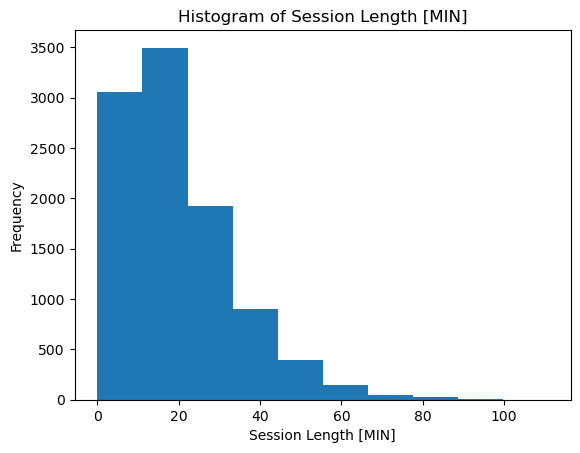

In [11]:
df["SessionLengthMin"].plot(kind='hist', bins=10)

plt.xlabel("Session Length [MIN]")
plt.title("Histogram of Session Length [MIN]")
plt.show()

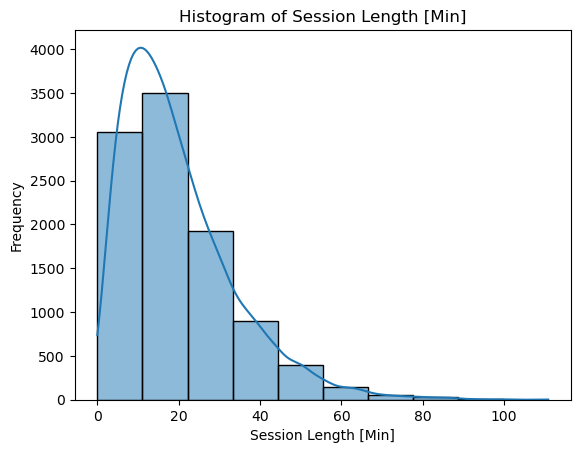

In [12]:
# plot histogram
sns.histplot(df['SessionLengthMin'], kde=True, bins=10)
plt.title('Histogram of Session Length [Min]')
plt.xlabel('Session Length [Min]')
plt.ylabel('Frequency')
plt.show()

Create a bar chart of session counts by StudentLevel.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [14]:
df.groupby("StudentLevel")["SessionID"].count()

StudentLevel
Graduate         1995
High School      2027
Undergraduate    5978
Name: SessionID, dtype: int64

In [15]:
session_counts = df["StudentLevel"].value_counts()
session_counts

StudentLevel
Undergraduate    5978
High School      2027
Graduate         1995
Name: count, dtype: int64

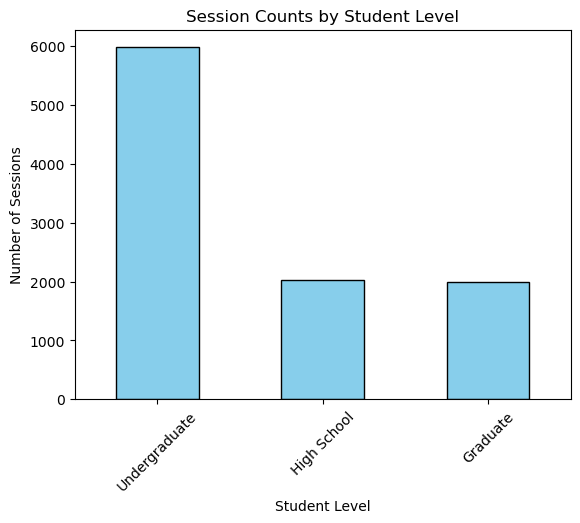

In [16]:
# Count sessions by StudentLevel
session_counts = df["StudentLevel"].value_counts()
session_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Plot bar chart
plt.title("Session Counts by Student Level")
plt.xlabel("Student Level")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.show()

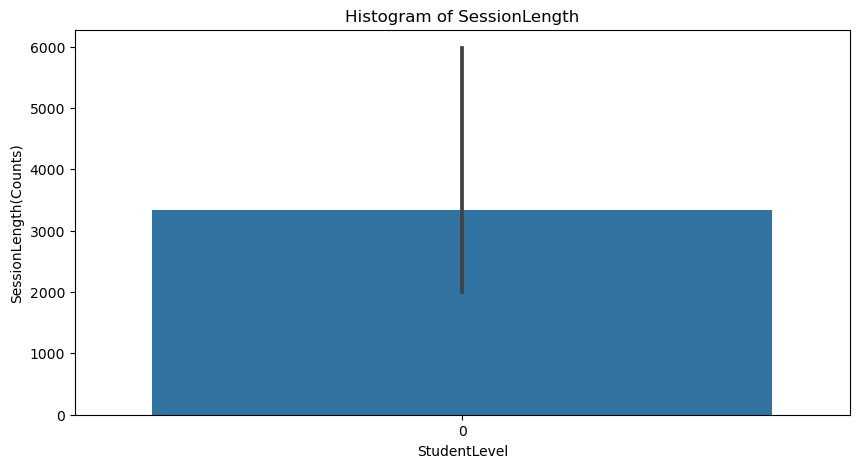

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(df.groupby("StudentLevel")["SessionLengthMin"].count().round(2))
plt.title('Histogram of SessionLength')
plt.xlabel('StudentLevel')
plt.ylabel('SessionLength(Counts)')
plt.show()

Make a countplot of TaskType using Seaborn.

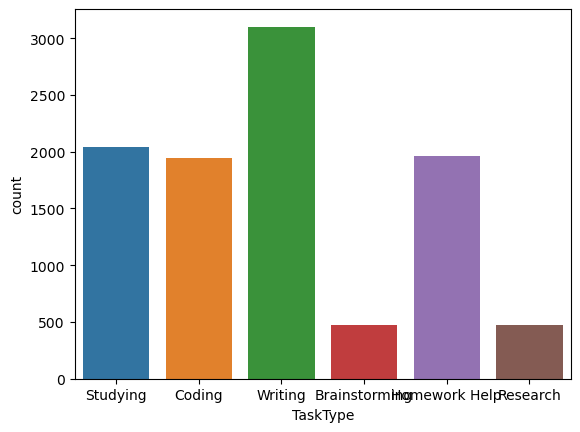

In [18]:
sns.countplot(x= "TaskType", data=df)

plt.show()

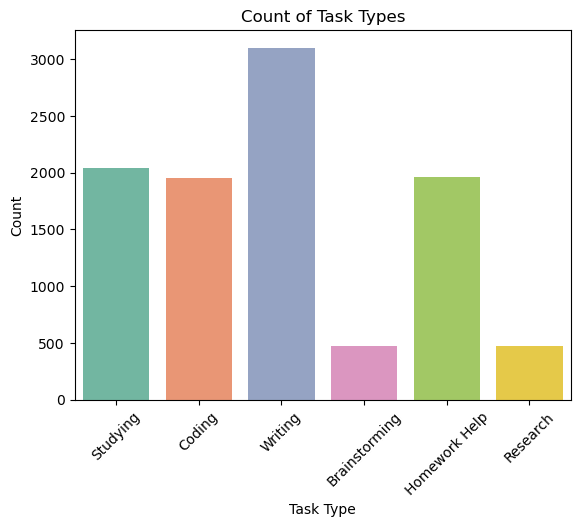

In [19]:
sns.countplot(data=df, x="TaskType", palette="Set2")

plt.title("Count of Task Types")
plt.xlabel("Task Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Plot a boxplot of SessionLengthMin grouped by StudentLevel.

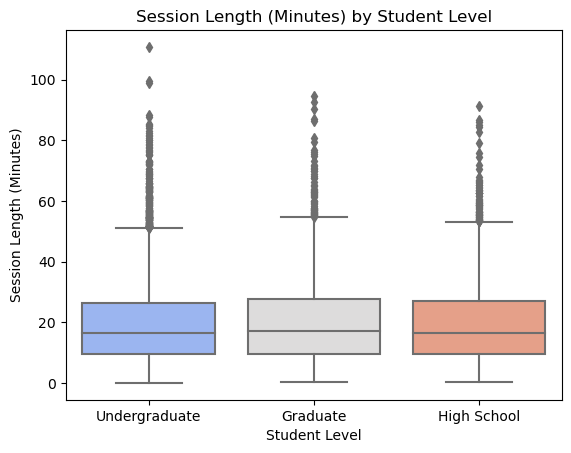

In [20]:
sns.boxplot(data=df, x="StudentLevel", y="SessionLengthMin", palette="coolwarm")

plt.title("Session Length (Minutes) by Student Level")
plt.xlabel("Student Level")
plt.ylabel("Session Length (Minutes)")
# plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()

Create a pie chart showing proportions of FinalOutcome.

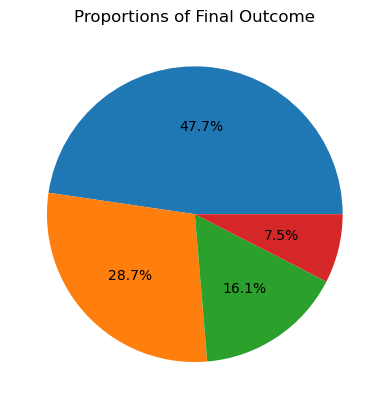

In [21]:
plt.pie(
    df["FinalOutcome"].value_counts(), 
    autopct="%1.1f%%", #show percentages
    
)
plt.title("Proportions of Final Outcome")
plt.ylabel("")  # remove y-axis label

plt.show()

In [22]:
df["FinalOutcome"]

0       Assignment Completed
1       Assignment Completed
2       Assignment Completed
3       Assignment Completed
4       Assignment Completed
                ...         
9995    Assignment Completed
9996    Assignment Completed
9997            Idea Drafted
9998    Assignment Completed
9999    Assignment Completed
Name: FinalOutcome, Length: 10000, dtype: object

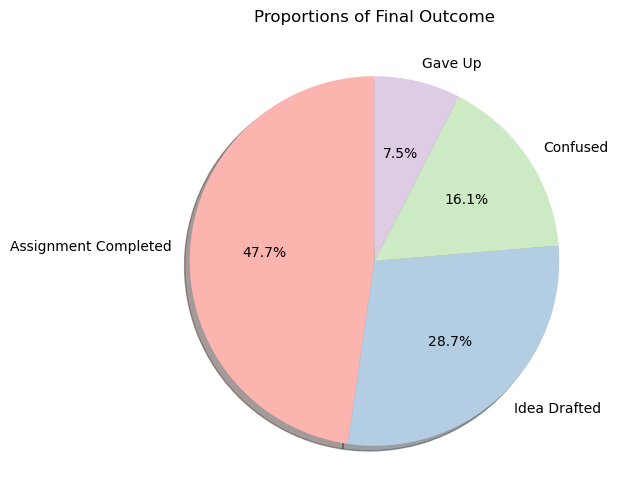

In [23]:
outcome_counts = df["FinalOutcome"].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
outcome_counts.plot(
    kind="pie", 
    autopct="%1.1f%%",      # show percentages
    startangle=90,          # rotate start
    colors=plt.cm.Pastel1.colors,  # nice color palette
    shadow=True
)

plt.title("Proportions of Final Outcome")
plt.ylabel("")  # remove y-axis label
plt.show()

Draw a scatterplot of SessionLengthMin vs. TotalPrompts.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


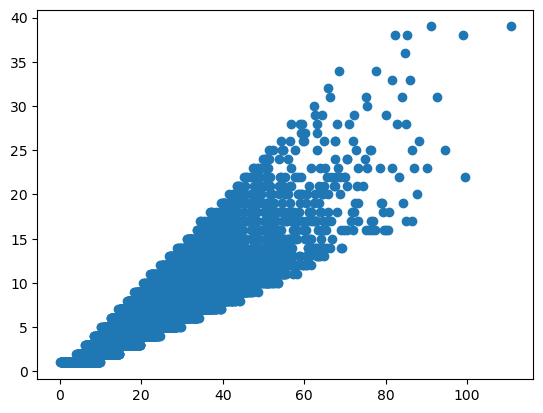

In [25]:
x= df["SessionLengthMin"]
y= df["TotalPrompts"]
plt.scatter(x, y)

plt.show()

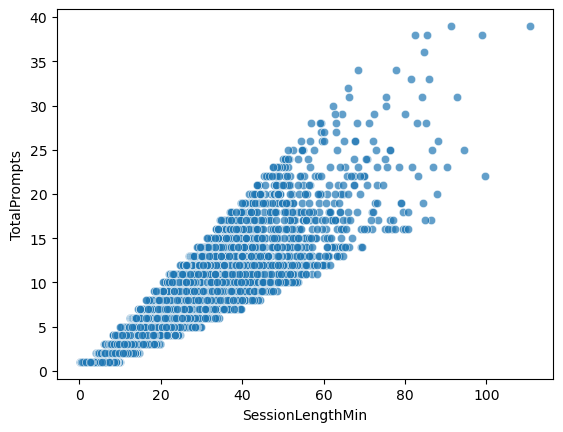

In [26]:
sns.scatterplot(data=df, x="SessionLengthMin", y="TotalPrompts", alpha=0.7)

plt.show()

Plot a line chart of average AI_AssistanceLevel over time (SessionDate).

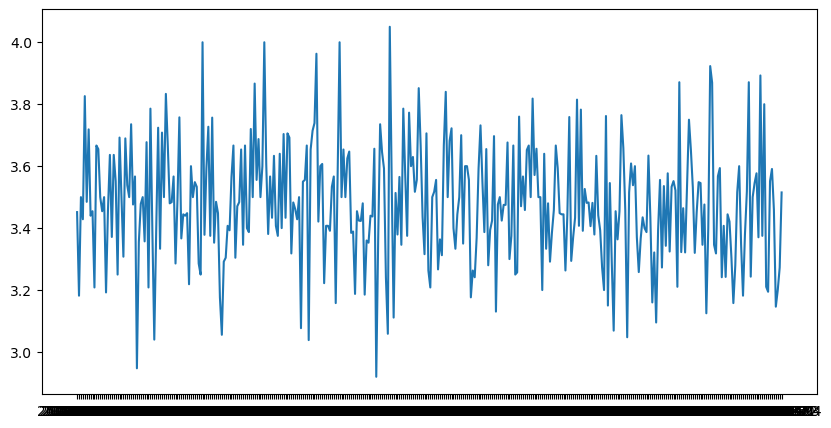

In [27]:
plt.figure(figsize=(10,5))
plt.plot( df.groupby("SessionDate")["AI_AssistanceLevel"].mean())

plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


Text(0.5, 1.0, 'Correlation Map')

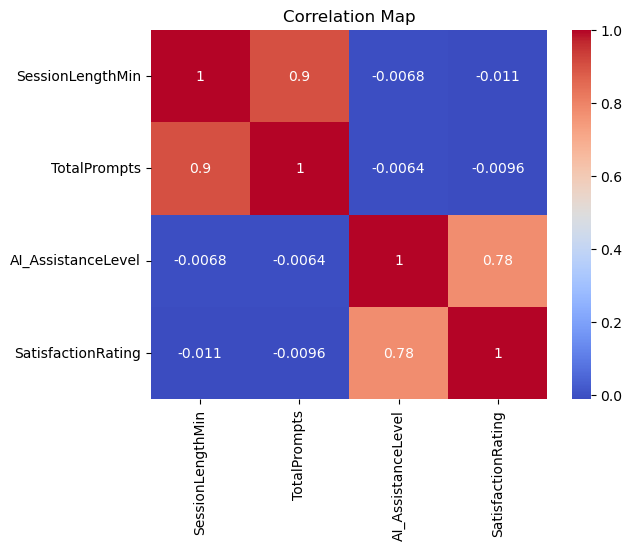

In [29]:
numeric_cols = ["SessionLengthMin", "TotalPrompts","AI_AssistanceLevel", "SatisfactionRating"]
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Map")

In [30]:
# sessionlength for each tasktype 
df.groupby("TaskType")["SessionLengthMin"].mean().round(2)

TaskType
Brainstorming    21.96
Coding           19.47
Homework Help    19.94
Research         20.41
Studying         19.71
Writing          19.71
Name: SessionLengthMin, dtype: float64

In [31]:
# discipline with most sessions
count_discipline = df["Discipline"].value_counts()

print(f"The Discipline with most sessions is {count_discipline.index[0]} with a count of {count_discipline[0]} ")

The Discipline with most sessions is Biology with a count of 1458 


In [32]:
# average AI_AssistanceLevel across StudentLevel.

df.groupby("StudentLevel")["AI_AssistanceLevel"].mean().round(2)

StudentLevel
Graduate         3.47
High School      3.48
Undergraduate    3.48
Name: AI_AssistanceLevel, dtype: float64

In [33]:
#  common final outcome for graduate students
graduate_outcome= df[df["StudentLevel"] == "Graduate"]["FinalOutcome"].value_counts()

print(f"The most common outcome for Graduates is {graduate_outcome.index[0]}" )

print(graduate_outcome)

The most common outcome for Graduates is Assignment Completed
FinalOutcome
Assignment Completed    936
Idea Drafted            567
Confused                331
Gave Up                 161
Name: count, dtype: int64


In [34]:
# meadian sessionlength for each final outcome
df.groupby("FinalOutcome")["SessionLengthMin"].median().sort_values(ascending=False)

FinalOutcome
Gave Up                 17.290
Idea Drafted            17.085
Assignment Completed    16.570
Confused                16.040
Name: SessionLengthMin, dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


## Feature Engineering and Encoding

In [36]:
df["SessionDate"]=pd.to_datetime(df["SessionDate"])

In [37]:
# break sesiondate into 3 columns "year", "month", "day"

df[['Year', 'Month', 'Day']] = df["SessionDate"].apply(lambda x:x.timetuple()[:3]).tolist()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SessionID           10000 non-null  object        
 1   StudentLevel        10000 non-null  object        
 2   Discipline          10000 non-null  object        
 3   SessionDate         10000 non-null  datetime64[ns]
 4   SessionLengthMin    10000 non-null  float64       
 5   TotalPrompts        10000 non-null  int64         
 6   TaskType            10000 non-null  object        
 7   AI_AssistanceLevel  10000 non-null  int64         
 8   FinalOutcome        10000 non-null  object        
 9   UsedAgain           10000 non-null  bool          
 10  SatisfactionRating  10000 non-null  float64       
 11  Year                10000 non-null  int64         
 12  Month               10000 non-null  int64         
 13  Day                 10000 non-null  int64      

In [39]:
df["SessionDate"].head()

0   2024-11-03
1   2024-08-25
2   2025-01-12
3   2025-05-06
4   2025-03-18
Name: SessionDate, dtype: datetime64[ns]

In [40]:
# encode student level (label encoding)
from sklearn.preprocessing import LabelEncoder

label_enc= LabelEncoder()

df["StudentLevel_Encode"] = label_enc.fit_transform(df["StudentLevel"])
print("Category Mapping:", label_enc.classes_)

Category Mapping: ['Graduate' 'High School' 'Undergraduate']


In [41]:
# encode tasktype (One Hot encoding)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

tasktype_encode= encoder.fit_transform(df[["TaskType"]])
one_hot_df= pd.DataFrame(tasktype_encode, columns=encoder.get_feature_names_out())
one_hot_df.head()

,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
# new feature Promptsperminute

df["PromptsPerMinute"] = df["TotalPrompts"]/ df["SessionLengthMin"]
df["PromptsPerMinute"].head()

0    0.352564
1    0.458365
2    0.260146
3    0.270270
4    0.320057
Name: PromptsPerMinute, dtype: float64

In [43]:
# categorize "SessionLengthMin" into Short, Medium, Long
print(df["SessionLengthMin"].median())
print(df["SessionLengthMin"].max())
print(df["SessionLengthMin"].min())

16.65
110.81
0.03


In [44]:
df["SessionLength_Category"]=pd.cut(
    df["SessionLengthMin"],
    bins=[0,30,60,df["SessionLengthMin"].max()],
    labels= ["Short", "Medium", "Long"]
)
print(df["SessionLength_Category"].value_counts())

SessionLength_Category
Short     8044
Medium    1794
Long       162
Name: count, dtype: int64
